In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/Alcohol Data Analysis/Alcohol study data/Maths.csv')

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
X1=df[['school', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'studytime', 'schoolsup', 'famsup', 'paid', 'higher', 'internet', 'famrel', 'Dalc', 'Walc']]
X2=df[['sex', 'age', 'famsize', 'Pstatus', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout']]


In [7]:
Y1=df['health'] #1-5, 5 is very good
Y2=df['absences']
Y3=df['G3'] #0-20
Y4=df['failures']
Y5=df['Dalc']#1-5, 5 is very high
Y6=df['Walc']#1-5, 5 is very high

In [8]:
X1['school']=[0 if x == 'GP' else 1 for x in X1['school']]
X1['famsize']=[0 if x == 'LE3' else 1 for x in X1['famsize']]
X1['Pstatus']=[0 if x == 'A' else 1 for x in X1['Pstatus']]
X1['schoolsup']=[0 if x == 'no' else 1 for x in X1['schoolsup']]
X1['famsup']=[0 if x == 'no' else 1 for x in X1['famsup']]
X1['paid']=[0 if x == 'no' else 1 for x in X1['paid']]
X1['higher']=[0 if x == 'no' else 1 for x in X1['higher']]
X1['internet']=[0 if x == 'no' else 1 for x in X1['internet']]
X1['class_year']=X1['age']-Y4-6

<ipython-input-8-918ccc719d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['school']=[0 if x == 'GP' else 1 for x in X1['school']]
<ipython-input-8-918ccc719d45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['famsize']=[0 if x == 'LE3' else 1 for x in X1['famsize']]
<ipython-input-8-918ccc719d45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [9]:
X1=X1.drop(columns=['age'])
X1

,school,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,paid,higher,internet,famrel,Dalc,Walc,class_year
0,0,1,0,4,4,2,1,0,0,1,0,4,1,1,12
1,0,1,1,1,1,2,0,1,0,1,1,5,1,1,11
2,0,0,1,1,1,2,1,0,1,1,1,4,2,3,6
3,0,1,1,4,2,3,0,1,1,1,1,3,1,1,9
4,0,1,1,3,3,2,0,1,1,1,0,4,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,0,2,2,2,0,1,1,1,0,5,4,5,12
391,1,0,1,3,1,1,0,0,0,1,1,2,3,4,11
392,1,1,1,1,1,1,0,0,0,1,0,5,3,3,12
393,1,0,1,3,2,1,0,0,0,1,1,4,3,4,12


In [10]:
Y3_passing=[0 if y <= 9 else 1 for y in Y3]

In [11]:
Y5

0      1
1      1
2      2
3      1
4      1
      ..
390    4
391    3
392    3
393    3
394    3
Name: Dalc, Length: 395, dtype: int64

In [12]:
X1

,school,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,paid,higher,internet,famrel,Dalc,Walc,class_year
0,0,1,0,4,4,2,1,0,0,1,0,4,1,1,12
1,0,1,1,1,1,2,0,1,0,1,1,5,1,1,11
2,0,0,1,1,1,2,1,0,1,1,1,4,2,3,6
3,0,1,1,4,2,3,0,1,1,1,1,3,1,1,9
4,0,1,1,3,3,2,0,1,1,1,0,4,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,0,2,2,2,0,1,1,1,0,5,4,5,12
391,1,0,1,3,1,1,0,0,0,1,1,2,3,4,11
392,1,1,1,1,1,1,0,0,0,1,0,5,3,3,12
393,1,0,1,3,2,1,0,0,0,1,1,4,3,4,12


In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   school     395 non-null    int64
 1   age        395 non-null    int64
 2   famsize    395 non-null    int64
 3   Pstatus    395 non-null    int64
 4   Medu       395 non-null    int64
 5   Fedu       395 non-null    int64
 6   studytime  395 non-null    int64
 7   schoolsup  395 non-null    int64
 8   famsup     395 non-null    int64
 9   paid       395 non-null    int64
 10  higher     395 non-null    int64
 11  internet   395 non-null    int64
 12  famrel     395 non-null    int64
 13  Dalc       395 non-null    int64
 14  Walc       395 non-null    int64
dtypes: int64(15)
memory usage: 46.4 KB


In [ ]:
### After interim report 

#### More focus on Hyperparameter tuning for following ML algos

# Logistic regression, SVM, Random Forest, Gradient Boosting


### After that, if we have a better results for RF or GB then, we can derive 

### Logistic Regression Grid Search 

In [20]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4, 8),
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [ 2000]
    }
]

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3)

In [22]:
y_list = [Y1,Y2,Y3,Y4] #Y1 ~ Y4

In [23]:
X_input = X1
res= []
for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
  best_clf = clf.fit(X1_train,y_train) 
  res.append([clf.best_params_,clf.score(X1_test,y_test)])

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

In [24]:
res

[[{'C': 0.019306977288832496,
   'max_iter': 2000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  0.3670886075949367],
 [{'C': 0.0001, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'},
  0.2911392405063291],
 [{'C': 0.019306977288832496,
   'max_iter': 2000,
   'penalty': 'l2',
   'solver': 'newton-cg'},
  0.10126582278481013],
 [{'C': 3.727593720314938,
   'max_iter': 2000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  0.810126582278481]]

In [25]:
# Y5& Y6
y_list = [Y5,Y6]
ohe = ["sex","famsize",	"Pstatus",	"higher",	"internet","romantic"]
X2_d = pd.get_dummies(X2, prefix=ohe, columns=ohe)
X_input = X2_d
res= []
for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
  best_clf = clf.fit(X1_train,y_train) 
  res.append([clf.best_params_,clf.score(X1_test,y_test)])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [26]:
res

[[{'C': 0.0001, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'},
  0.759493670886076],
 [{'C': 0.2682695795279725,
   'max_iter': 2000,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  0.45569620253164556]]

SVM grid search cv


In [43]:
### SVM grid search cv #y1 - y4
from sklearn import svm,pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


#Hyperparamter tuning using Gridsearch
svm = svm.SVC()
# param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf'], 'gamma':['auto'] }
param_grid = {'C': [0.1, 1, 10, ],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

grid = GridSearchCV(svm,param_grid)




X_input = X1
res_svm= []
y_list = [Y1,Y2,Y3,Y4] #Y1 ~ Y4
for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)

  X1_train_scaled = preprocessing.scale(X1_train)
  X1_test_scaled = preprocessing.scale(X1_test)

  grid.fit(X1_train_scaled,y_train)
  grid_svc = grid.predict(X1_test_scaled)
  accuracy_score(y_test,grid_svc)
  
  
  best_clf = clf.fit(X1_train,y_train) 
  res_svm.append(accuracy_score(y_test,grid_svc))

res_svm

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[0.379746835443038,
 0.2911392405063291,
 0.17721518987341772,
 0.8227848101265823]

In [31]:
#### SVM grid search cv for Y5 , Y6
from sklearn import svm,pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


#Hyperparamter tuning using Gridsearch
svm = svm.SVC()
# param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf'], 'gamma':['auto'] }
param_grid = {'C': [0.1, 1, 10, ],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

grid = GridSearchCV(svm,param_grid)




X_input = X2_d
y_list = [Y5,Y6]
res_svm= []
for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)

  X1_train_scaled = preprocessing.scale(X1_train)
  X1_test_scaled = preprocessing.scale(X1_test)

  grid.fit(X1_train_scaled,y_train)
  grid_svc = grid.predict(X1_test_scaled)
  accuracy_score(y_test,grid_svc)
  
  
  best_clf = clf.fit(X1_train,y_train) 
  res_svm.append(accuracy_score(y_test,grid_svc))

res_svm

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.759493670886076, 0.379746835443038]

Random Forest Grid search cv

In [44]:
### RF grid search y1-y4

from sklearn.ensemble import RandomForestClassifier

X_input = X1
res= []
rfc=RandomForestClassifier(random_state=42)


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


y_list = [Y1,Y2,Y3,Y4] #Y1 ~ Y4
for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X1_train, y_train)
  res.append([CV_rfc.best_params_,CV_rfc.score(X1_test,y_test)])

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [45]:
res #y1-y4

[[{'criterion': 'gini',
   'max_depth': 4,
   'max_features': 'auto',
   'n_estimators': 500},
  0.379746835443038],
 [{'criterion': 'entropy',
   'max_depth': 5,
   'max_features': 'auto',
   'n_estimators': 500},
  0.25316455696202533],
 [{'criterion': 'gini',
   'max_depth': 7,
   'max_features': 'auto',
   'n_estimators': 200},
  0.11392405063291139],
 [{'criterion': 'gini',
   'max_depth': 5,
   'max_features': 'auto',
   'n_estimators': 200},
  0.8354430379746836]]

In [34]:
### RF grid search cv for Y5 and Y 6
from sklearn.ensemble import RandomForestClassifier

X_input = X2_d
res= []
rfc=RandomForestClassifier(random_state=42)


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

y_list = [Y5,Y6]

for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X1_train, y_train)
  res.append([CV_rfc.best_params_,CV_rfc.score(X1_test,y_test)])

In [35]:
res

[[{'criterion': 'entropy',
   'max_depth': 5,
   'max_features': 'auto',
   'n_estimators': 500},
  0.7721518987341772],
 [{'criterion': 'gini',
   'max_depth': 4,
   'max_features': 'auto',
   'n_estimators': 200},
  0.45569620253164556]]

#### Gradient Boosting 

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[50,100,200],
    "max_depth":[5,7,9,20],
    "learning_rate":[0.01,0.1]
}

In [37]:
# Grid cv for Y1 ~ Y4
X_input = X1
res= []

y_list = [Y1,Y2,Y3,Y4]

for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
  cv = GridSearchCV(gbc,parameters,cv=3)
  cv.fit(X1_train, y_train)
  res.append([cv.best_params_,cv.score(X1_test,y_test)])

res

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[[{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50},
  0.34177215189873417],
 [{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50},
  0.25316455696202533],
 [{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200},
  0.12658227848101267],
 [{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50},
  0.8227848101265823]]

In [38]:
# Grid cv for Y5 and Y5
X_input = X2_d
res= []

y_list = [Y5,Y6]

for y in y_list:
  X1_train, X1_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
  cv = GridSearchCV(gbc,parameters,cv=3)
  cv.fit(X1_train, y_train)
  res.append([cv.best_params_,cv.score(X1_test,y_test)])

res

[[{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50},
  0.7721518987341772],
 [{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50},
  0.46835443037974683]]

Feature importance from Random Forest for Y4

<ipython-input-39-dca21dcf4e60>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = X1.columns


Text(0.5, 0, 'Random Forest Feature Importance')

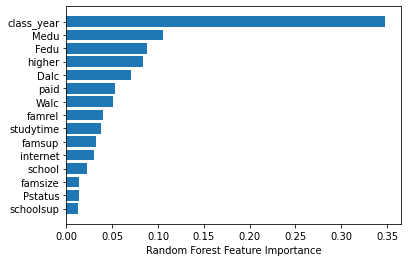

In [39]:
### Feature importance from Random Forest 
from sklearn.ensemble import RandomForestClassifier


### Y4 
X_train = X1
y_train = Y4

rf = RandomForestClassifier(criterion= 'gini',
   max_depth=  4,
   max_features='auto',
   n_estimators= 200)
rf.fit(X_train, y_train)


df.feature_names = X1.columns

sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

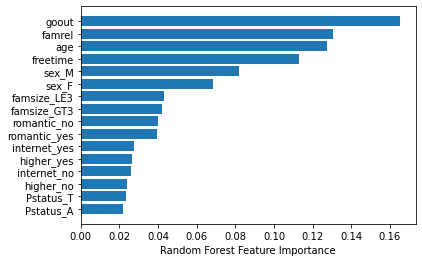

In [40]:
### Feature importance from Random Forest 
from sklearn.ensemble import RandomForestClassifier
ohe = ["sex","famsize",	"Pstatus",	"higher",	"internet","romantic"]
### Y5
X2_d = pd.get_dummies(X2, prefix=ohe, columns=ohe)
X_train = X2_d
y_train = Y5

rf = RandomForestClassifier(criterion= 'entropy',max_depth=5,max_features='auto',
   n_estimators= 500)
rf.fit(X_train, y_train)


df.feature_names = X2_d.columns

sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")